In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

**<font size="5" color="red">ch2. 한글 형태소 분석</font>**
# 1. 자연어 처리
- 일상적인 언어를 처리
- 자연어 처리 분야
    * 자연어 이해 : 형태소분석 -> pos tagging -> 의미 분석
    * 자연어 생성 : 대화분석 -> 다음 문장이나 단어를 출력(RNN, LSTM, ... GAN, 생성형 알고리즘)
- 활용분야 : 트렌드분석, 맞춤법검사, 번역기, 키워드분석, 쳇봇

# 2. 자연어처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사 태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, ....

# 3. 한글 형태소 분석 엔진(Konlpy)
* 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
* HanNanum만의 기능 : analyze(형태소 후보 반환)
* Kkma만의 기능 : 텍스트를 문장별로 나누는 기능

- Konlpy : python 용 자연어 처리기(JPype1(C++ v14) 패키지를 의존)
    * pip install konlpy
        + HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Kkma : 서울대에서 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Komoran :  자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Okt
    * pip install python-mecab-ko
        + MeCab : C++로 작성되었고, 저사양환경에서 사용 가능. 다양한 언어의 바인딩 지원
- Konlp : R용 자연어 처리기

In [2]:
import os
os.environ.get('JAVA_HOME')
# VC++ 14 버전 이상 설치

'C:\\Program Files\\Java\\jdk-17'

In [ ]:
# pip install jpype1 (내 OS와 python버전에 맞는 최신 버전의 whl 설치파일을 찾아 설치)

In [3]:
%ls

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D0E-15FE

 D:\ai\source\10_자연어처리 디렉터리

2024-12-27  오후 02:11    <DIR>          .
2024-12-27  오후 02:11    <DIR>          ..
2024-12-27  오후 02:12    <DIR>          .ipynb_checkpoints
2024-12-27  오후 05:58           104,479 ch1_NLTK자연어처리 패키지.ipynb
2024-12-30  오전 10:33             5,798 ch2_한글형태소분석.ipynb
2024-12-27  오전 09:14           344,509 JPype1-1.4.0-cp310-cp310-win_amd64.whl
2024-12-27  오전 09:14           351,472 JPype1-1.5.0-cp310-cp310-win_amd64.whl
2024-12-27  오전 12:00           356,064 jpype1-1.5.1-cp310-cp310-win_amd64.whl
               5개 파일           1,162,322 바이트
               3개 디렉터리  472,896,700,416 바이트 남음


In [4]:
! pip install jpype1-1.5.1-cp310-cp310-win_amd64.whl
# pip install jpype1==1.5.0

Processing d:\ai\source\10_자연어처리\jpype1-1.5.1-cp310-cp310-win_amd64.whl


In [ ]:
# pip install konlpy 후, 아래의 코드가 실행이 안 될 경우
# pip uninstall konlpy -> pip uninstall jpype1
# ! pip install jpype1-1.5.0-cp310-cp310-win_amd64.whl 또는 ! pip install jpype1-1.4.0-cp310-cp310-win_amd64.whl
# pip install konlpy

In [5]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로
많이 사용되는 언어입니다
'''

## 3.1 HanNanum

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,
                   max_heap_size=1024) # 기본값:1024, '1g', '2048m'
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

- pos tagging chart 다운로드
    * 구글에서 konlpy docs검색후 konlpy.org
    * api 메뉴클릭 -> "품사 태깅 클래스 간 비교(Comparision between POS tagging classes)" 클릭
    * "한국어 품사 태그 비교표(Korean POS tags comparision chart)" 클릭

In [8]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [9]:
# 명사만 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [10]:
# 품사태그
print(hannanum.pos(text)) # 기본값 : ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [14]:
print(hannanum.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [20]:
# 퀴즈1 : text 중에서 형용사(PA)만 추출
tagged_text = hannanum.pos(text, ntags=22)
# [tagtext[0] for tagtext in tagged_text if tagtext[1]=='PA']
[token for token, tag in tagged_text if tag=='PA']

['아름답', '많']

In [21]:
# 퀴즈2 : text 중에서 보통명사(NC)만 추출
# [tagtext[0] for tagtext in tagged_text if tagtext[1]=='NC']
[token for token, tag in tagged_text if tag=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma

In [23]:
from konlpy.tag import Kkma
kkma = Kkma() # 기본 max_heap_size는 1024 바이트 '10m' '1g'
print(kkma.morphs(text)) # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [24]:
print(kkma.nouns(text)) # 명사 추출

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [27]:
# 품사 태깅
print(kkma.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [30]:
#보통명사(NNG)+고유명사(NNP)
tagged_text = kkma.pos(text)
[word for word, tag in tagged_text if (tag=='NNG') | (tag=='NNP')]
[word for word, tag in tagged_text if tag=='NNG' or tag=='NNP']
[word for word, tag in tagged_text if tag in ('NNG','NNP')]

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [31]:
from konlpy.tag import Komoran
komoran = Komoran() # max_heap_size=1024기본값이나 조정 가능
print(komoran.morphs(text)) # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [32]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [33]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [34]:
# 일반명사(NNG), 고유명사(NNP)
[word for word, tag in komoran.pos(text) if tag in ('NNG', 'NNP')]

['한국어', '전', '세계', '사용', '언어']

## 3.4 MeCab
- pip install python-mecab-ko

In [36]:
from mecab import MeCab # 제일 가벼운 엔진
mecab = MeCab()
print('형태소 추출 :',mecab.morphs(text))
print('명사 추출 :', mecab.nouns(text))
print('품사 태깅 :', mecab.pos(text))

형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]


In [38]:
print('일반 명사만 추출 :',
      [token for token, tag in mecab.pos(text) if tag=='NNG'])

일반 명사만 추출 : ['한국어', '세계', '사용', '언어']


## 3.5 Twitter(Okt ; Open Korean Text)
- konlpy 버전 0.4.5부터 Okt로 바뀜. 가장 쓰임이 적음

In [39]:
import konlpy
konlpy.__version__

'0.6.0'

In [43]:
from konlpy.tag import Twitter, Okt
twitter = Okt()
print('구 추출 :',twitter.phrases(text))
print('형태소 : ',twitter.morphs(text))
print('명사만 : ', twitter.nouns(text))
print('품사 태깅 :', twitter.pos(text))
print('명사만 :',
     [token for token, tag in twitter.pos(text) if tag=='Noun'])

구 추출 : ['다소', '한국어', '전세계', '13번째', '사용', '사용되는 언어', '13', '번째', '언어']
형태소 :  ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '\n', '많이', '사용', '되는', '언어', '입니다', '\n']
명사만 :  ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('\n', 'Foreign'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('\n', 'Foreign')]
명사만 : ['다소', '한국어', '전세계', '번', '사용', '언어']


# 4. 말뭉치

In [45]:
! pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\pc\anaconda3\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [53]:
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 가져옴
data = kolaw.open('constitution.txt').read() # 한줄씩 list로 가져옴
print('글자수 : ', len(data))
print("%r" % data[:100])

글자수 :  18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드
- pip install wordcloud

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [62]:
import nltk
from nltk.tokenize import RegexpTokenizer # 단어 추출(정규표현식을 활용한)
from nltk.tag import pos_tag
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
# 단어추출
ret = RegexpTokenizer('[\w]{3,}')
words = ret.tokenize(emma)
# 명사만 추출
emma_tags = pos_tag(words)
# noun_list = [emma_tag[0] for emma_tag  in emma_tags if emma_tag[1] in ('NN', 'NNS')]
noun_list = [word for word, tag in emma_tags if tag in ('NN', 'NNS')]
emma_noun = ' '.join(noun_list)
emma_noun[:100]

'clever home disposition blessings existence years world distress daughters indulgent father conseque'

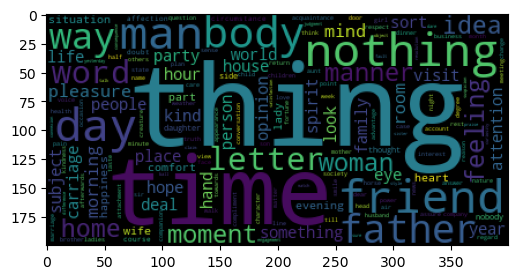

In [64]:
wordc = WordCloud( )
wordc.generate(emma_noun)
plt.figure(figsize=(10,3))
plt.imshow(wordc)
plt.show()

In [69]:
# 명사 갯수
len(noun_list), len(set(noun_list))

(22147, 3564)

- 컬러맵
    - https://matplotlib.org/tutorials/colors/colormaps.html

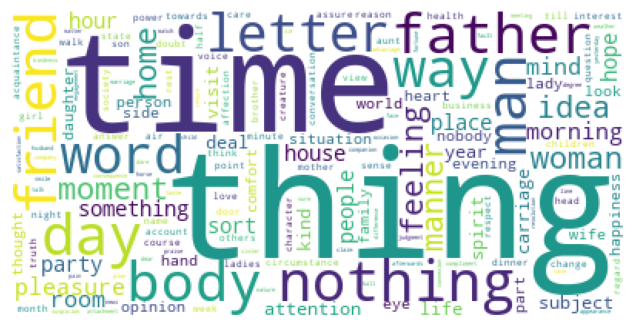

In [80]:
wordc = WordCloud(
            background_color='white', #배경색
            max_words=400, # 표시될 단어의 최대 갯수
            relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
            colormap='viridis' # 컬러맵
)
wordc.generate(emma_noun)
plt.figure(figsize=(10,4))
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [84]:
# data 명사 추출 후 하나의 연결된 문자 : ' '.join(명사추출리스트)
from konlpy.tag import Kkma
kkma = Kkma()
# word_list = kkma.nouns(data)
#보통명사,고유명사
word_list = [word for word, tag in kkma.pos(data) if tag in ['NNG', 'NNP']]
data_noun = ' '.join(word_list)
data_noun[:20]

'대한민국 헌법 유구 역사 전통 국민 '

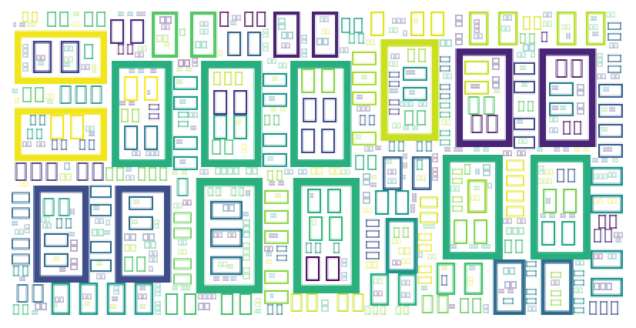

In [85]:
wordc = WordCloud(
            background_color='white', #배경색
            max_words=400, # 표시될 단어의 최대 갯수
            relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
            colormap='viridis' # 컬러맵
)
wordc.generate(data_noun)
plt.figure(figsize=(10,4))
plt.imshow(wordc)
plt.axis('off')
plt.show()